PikaruGenkiDesu_27_face03.json
ChinContour [[36.86606129398411, 98.72644721906923], [42.48467650397276, 113.78433598183881], [48.10329171396141, 129.06696935300795], [55.96935300794552, 143.00113507377978], [66.75709421112373, 154.46311010215663], [80.2417707150965, 163.90238365493755], [93.5017026106697, 172.8921679909194], [108.11010215664018, 180.08399545970488], [124.96594778660611, 181.43246311010213], [138.90011350737797, 175.8138479001135], [153.05902383654936, 167.9477866061294], [167.4426787741203, 159.40749148694664], [180.92735527809307, 150.19296254256525], [190.59137343927355, 138.95573212258796], [200.03064699205447, 125.69580022701476], [206.32349602724176, 109.96367763904652], [210.59364358683314, 94.00681044267878]]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
LeftEye [[146.54143019296254, 83.61804767309874], [156.6549375709421, 80.92111237230421], [167.4426787741203, 82.49432463110102], [178.2304199772985, 85.86549375709421], [186.5459704880817, 89.91089670828603], [186.5

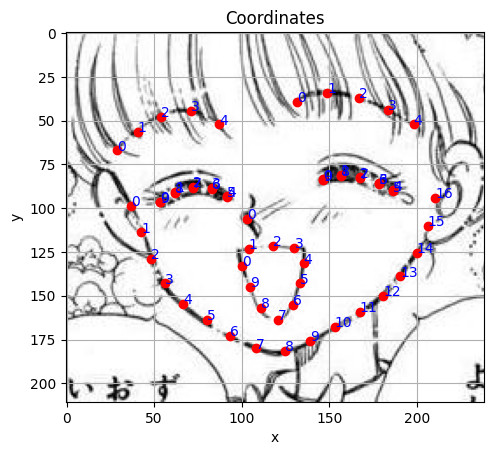

KeyboardInterrupt: Interrupted by user

In [11]:
import json
import re
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import time
from IPython.display import display, clear_output

def get_jpg_paths(directory):
    img_path_list = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".jpg"):
                img_path = os.path.join(root, file)
                img_path_list.append(img_path)
    return img_path_list


def get_file_names(directory):
    file_names = []
    for file_name in os.listdir(directory):
        if os.path.isfile(os.path.join(directory, file_name)):
            file_names.append(file_name)
    return file_names


dataset_img_path = "/root/dataset/Manga109_landmark_annotated/images"
dataset_json_path = "/root/dataset/Manga109_landmark_annotated/annotation_json"
# img_path_list = get_jpg_paths(dataset_dir_path)

json_path_list = get_file_names(dataset_json_path)


for json_path in json_path_list:
    clear_output(wait=True)
    print(json_path)
    json_file_name = json_path.split("/")[-1]
    image_name = json_file_name.replace(".json",".jpg")
    
    
    img = Image.open(f"{dataset_img_path}/{image_name}")
    fig, ax = plt.subplots(1)
    ax.imshow(img)
    
    
    
    # print(json_file_name)
    
    with open(f"{dataset_json_path}/{json_path}") as f:
        json_dir = json.load(f)
    
    face_parts = ["ChinContour","LeftEye","LeftEyeBrow","LeftPupil","Mouth","Nose","RightEye","RightEyeBrow","RightPupil"]

    all_coordinates = []
    # print(json_file["Image"])
    for part in face_parts:
        # print(part)
        # print(json_file["Face"][part]["Landmarks"])
        try:
            points_lists = json_dir[part]
            print(part,points_lists)
            x, y = zip(*points_lists)
            plt.plot(x, y, 'o',color='red')
            for i, txt in enumerate(points_lists):
                ax.annotate(i, (x[i], y[i]),color="blue")
                print(i)
                
            
            
            # for point in points_lists:
            #     all_coordinates.append(point)
        except:
            continue

    # x, y = zip(*all_coordinates)

    # x_np = np.array(x)
    # y_np = np.array(y)
        
        
    
    # img = Image.open(f"{dataset_img_path}/{image_name}")
    # fig, ax = plt.subplots(1)
    
    
    # plt.plot(x_np, y_np, 'o',color='red')  # 点と点を線でつなぐプロットを作成
    
    # plt.plot(x_np, y_np, 'o',color='red')  # 点と点を線でつなぐプロットを作成
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Coordinates')
    plt.grid(True)
    # plt.gca().invert_yaxis()
    plt.show()
    user_input = input("Enter something: ")

In [32]:
# manga109のjsonをcsvに書き換えるスクリプト

import json
import re
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import time
from IPython.display import display, clear_output
import csv

def get_jpg_paths(directory):
    img_path_list = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".jpg"):
                img_path = os.path.join(root, file)
                img_path_list.append(img_path)
    return img_path_list


def get_file_names(directory):
    file_names = []
    for file_name in os.listdir(directory):
        if os.path.isfile(os.path.join(directory, file_name)):
            file_names.append(file_name)
    return file_names
    
face_parts = ["ChinContour","LeftPupil","RightPupil","LeftEye","RightEye","LeftEyeBrow","RightEyeBrow","Nose","Mouth"]
face_parts_none_counts = {"ChinContour": 34, "LeftEye": 20, "LeftEyeBrow": 10, "LeftPupil": 2, "Mouth": 20, "Nose": 2, "RightEye": 20, "RightEyeBrow": 10, "RightPupil": 2}

json_path_list = get_file_names(dataset_json_path)


for json_path in json_path_list:
    print(json_path)
    with open(f"{dataset_json_path}/{json_path}") as f:
        json_dir = json.load(f)
    
    all_coordinates = []
    # print(json_file["Image"])眉毛
    for part in face_parts:
        # print(part)
        # print(json_file["Face"][part]["Landmarks"])
        points_lists = json_dir[part]
        # print(points_lists)
        if points_lists == []:
            # print("きた！")
            # print(part)
            points_lists = [[""]*face_parts_none_counts[part]]
            # print(points_lists)
        all_coordinates.extend(points_lists)
    # print(all_coordinates)
    image_name = json_path.replace(".json",".jpg")
    to_csv_list =[image_name]
    to_csv_list.extend([point for points_xy in all_coordinates for point in points_xy])
    print("len",to_csv_list)
    with open("./Manga109_annotated.csv","a") as f:
        writer = csv.writer(f)
        writer.writerow(to_csv_list)
            

PrismHeart_22_face00.json
len ['PrismHeart_22_face00.jpg', 10.0, 109.62693156732892, 12.178807947019868, 143.03532008830024, 15.810154525386315, 176.44370860927154, 19.44150110375276, 209.12582781456956, 37.235099337748345, 231.64017660044152, 59.023178807947026, 249.4337748344371, 81.17439293598234, 266.86423841059604, 103.32560706401767, 284.294701986755, 127.65562913907286, 297.3675496688742, 153.4381898454746, 291.5573951434879, 173.04746136865342, 275.2163355408389, 194.8355408388521, 257.05960264900665, 214.80794701986756, 238.90286975717441, 229.33333333333334, 215.2991169977925, 241.3167770419426, 188.06401766004416, 253.66335540838853, 161.19205298013247, 262.378587196468, 135.04635761589407, 217.34988962472406, 138.6777041942605, 95.69977924944813, 125.24172185430464, 201.73509933774835, 123.42604856512142, 211.53973509933775, 102.36423841059603, 231.5121412803532, 93.28587196467991, 250.75827814569536, 103.81677704194261, 257.294701986755, 124.15231788079471, 253.30022075055

In [3]:
face_parts_none_counts = {"ChinContour": 34, "LeftEye": 20, "LeftEyeBrow": 2, "LeftPupil": 10, "Mouth": 20, "Nose": 2, "RightEye": 20, "RightEyeBrow": 2, "RightPupil": 10}
for i in face_parts_none_counts.keys():
    print(i)

ChinContour
LeftEye
LeftEyeBrow
LeftPupil
Mouth
Nose
RightEye
RightEyeBrow
RightPupil
